# Bulldozer Price Prediction using Machine Learning

### 1. Problem Definition
For this data, the problem being assessed will be explored through leveraging **regression**.

This is because we will be using a various **features** about bulldozers to predict their sale price.

In a statement,
> How well can predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

### 2. Data
The data required to address this problem was acquired via [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data/). This is a time series problems; meaning that time is an attribute for this dataset.

Time-based attributes in this data are historical sale data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:
1. **Train.csv** - Historical bulldozer sales example up to 2011 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).
2. **Valid.csv** - Historical bulldozer sales examples from January 1, 2012 to April 30, 2012 (close to 12,000 examples with the same attributes as **Train.csv**).
3. **Test.csv** - Historical bulldozer sales examples from May 1, 2012 to November 2012 (close to 12,000 examples but missing the `SalePrice` attribute, as this is what we'll be trying to predict).

### 3. Evaluation
For this problem, [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) has set the evaluation metric to being root mean squared log error (RMSLE). As with most regression evaluations, the goal will be to minimize this number as much as possible.

To see how well the models are doing, we'll compute the RMSLE and then compare these results to others on the [Kaggle Leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

### 4. Features

Kaggle provides a data dictionary which contains information on each feature in the dataset [here](https://www.kaggle.com/account/login?returnUrl=%2Fcompetitions%2Fbluebook-for-bulldozers).

The following features are in the data dictionary and will be used to predict the SalePrice Attribute:
1. **SalesID** - Unique identifier of a particular sale of a machine at auction
2. **MachineID** - Identifier for a particular machine; machines may have multiple sales
3. **ModelID** - Identifier for a unique machine model (i.e. fiModelDesc)
4. **datasource** - Source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs.
5. **auctioneerID** - Identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.
6. **YearMade** - Year of manufacturer of the Machine
7. **MachineHoursCurrentMeter** - Current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale
8. **UsageBand** - Value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
9. **Saledate** - Time of sale
10. **Saleprice** - Cost of sale in USD
11. **fiModelDesc** - Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
12. **fiBaseModel** - Disaggregation of fiModelDesc
13. **fiSecondaryDesc** - Disaggregation of fiModelDesc
14. **fiModelSeries** - Disaggregation of fiModelDesc
15. **fiModelDescriptor** - Disaggregation of fiModelDesc
16. **ProductSize** - The size class grouping for a product group. Subsets within product group.
17. **ProductClassDesc** - Description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
18. **State** - US State in which sale occurred
19. **ProductGroup** - Identifier for top-level hierarchical grouping of fiModelDesc
20. **ProductGroupDesc** - Description of top-level hierarchical grouping of fiModelDesc
21. **Drive_System** - Typcially describes whether 2 or 4 wheel drive
22. **Enclosure** - Does machine have an enclosed cab or not
23. **Forks** - Attachment used for lifting
24. **Pad_Type** - Type of treads a crawler machine uses
25. **Ride_Control** - Optional feature on loaders to make the ride smoother
26. **Stick** - Type of control
27. **Transmission** - Describes type of transmission; typically automatic or manual
28. **Turbocharged** - Engine naturally aspirated or turbocharged
29. **Blade_Extension** - Extension of standard blade
30. **Blade_Width** - Width of blade
31. **Enclosure_Type** - Does machine have an enclosed cab or not
32. **Engine_Horsepower** - Engine horsepower rating
33. **Hydraulics** - Type of hydraulics
34. **Pushblock** - Option
35. **Ripper** - Implement attached to machine to till soil
36. **Scarifier** - Implement attached to machine to condition soil
37. **Tip_control** - Type of blade control
38. **Tire_Size** - Size of primary tires
39. **Coupler** - Type of implement interface
40. **Coupler_System** - Type of implement interface
41. **Grouser_Tracks** - Describes ground contact interface
42. **Hydraulics_Flow** - Normal or high flow hydraulic system
43. **Track_Type** - Type of treads a crawler machine uses
44. **Undercarriage_Pad_Width** - Width of crawler treads
45. **Stick_Lengt**h - Length of machine digging implement
46. **Thumb** - Attachment used for grabbing
47. **Pattern_Changer** - Can adjust the operator control configuration to suit the user
48. **Grouser_Type** - Type of treads a crawler machine uses
49. **Backhoe_Mounting** - Optional interface used to add a backhoe attachment
50. **Blade_Type** - Describes type of blade
51. **Travel_Controls** - Describes operator control configuration
52. **Differential_Type** - Differential type, typically locking or standard
53. **Steering_Controls** - Describes operator control configuration

There are **53 attributes/features** on bulldozers.

### 5. Preparing the Tools

In [121]:
# Importing EDA and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plots should appear in notebook
%matplotlib inline
import seaborn as sns

# Visualization themes and styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Regression Models
from sklearn.ensemble import RandomForestRegressor

# Regression Model Evalulators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 6. Load Data

In [4]:
# Import training and validation sets
df = pd.read_csv("TrainAndValid.csv", 
                 low_memory = False)

### 7. Exploratory Data Analysis (EDA)
EDA Template that will be followed for this problem:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and what are the different types of data present?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and are they something to be concerned about?
5. How can you add, change or remove features to get more out of your data?

#### 7.1 Data Description

In [5]:
# Top 5 rows of dataframe
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Shape of dataframe
print(df.shape)

(412698, 53)


This dataset contains 412698 observations/bulldozers (rows) and each observation/bulldozer is accompanied with 53 bulldozer attributes/indictators (columns) about them that influence their sale price.

#### 7.2 Descriptive Statistics

In [7]:
# Data types
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [12]:
# Summarize info on dataframe features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [9]:
# Number of unique values in each column
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
    
pd.DataFrame(dict, index = ["# of Unique Values"]).transpose()

,# of Unique Values
SalesID,412698
SalePrice,954
MachineID,348808
ModelID,5281
datasource,6
auctioneerID,30
YearMade,73
MachineHoursCurrentMeter,15633
UsageBand,3
saledate,4013


In [13]:
# Check for missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Wow, we got **alot** of missing values!

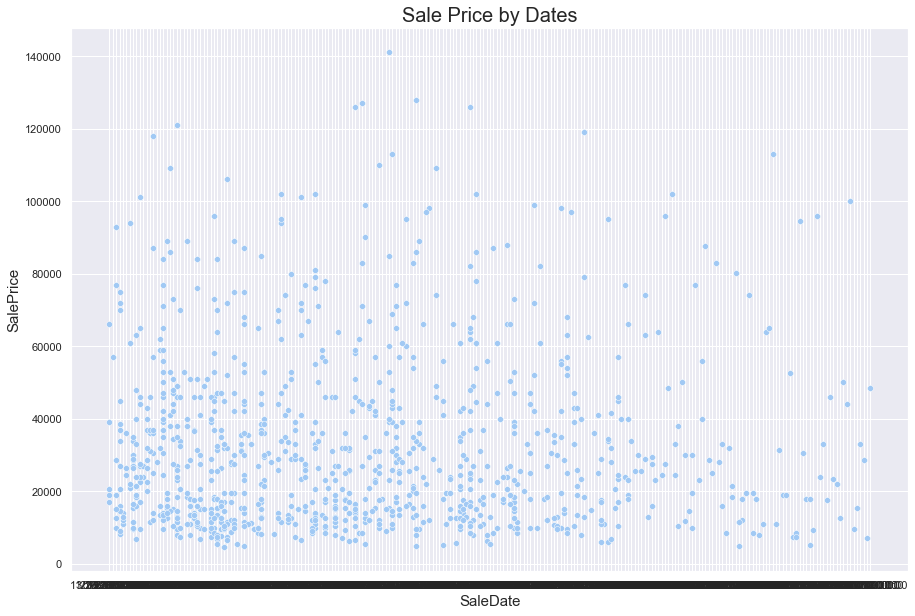

In [23]:
# Scatterplot of Saleprice (target variable) by saledate for the first 1000 rows
plt.figure(figsize = (15, 10))
saleprice_date_plot = sns.scatterplot(df["saledate"][:1000], df["SalePrice"][:1000])
saleprice_date_plot.set_title("Sale Price by Dates", fontsize = 20)
saleprice_date_plot.set_xlabel("SaleDate", fontsize = 15)
saleprice_date_plot.set_ylabel("SalePrice", fontsize = 15);

It seems our x-axis values are overlapping, let's explore the `saledate` feature.

In [22]:
# Checking entries for saledate feature
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

Ah, because these are dates, the x-axis values are overlapping. Let's try plotting a **histogram** of the `SalePrice` feature. 

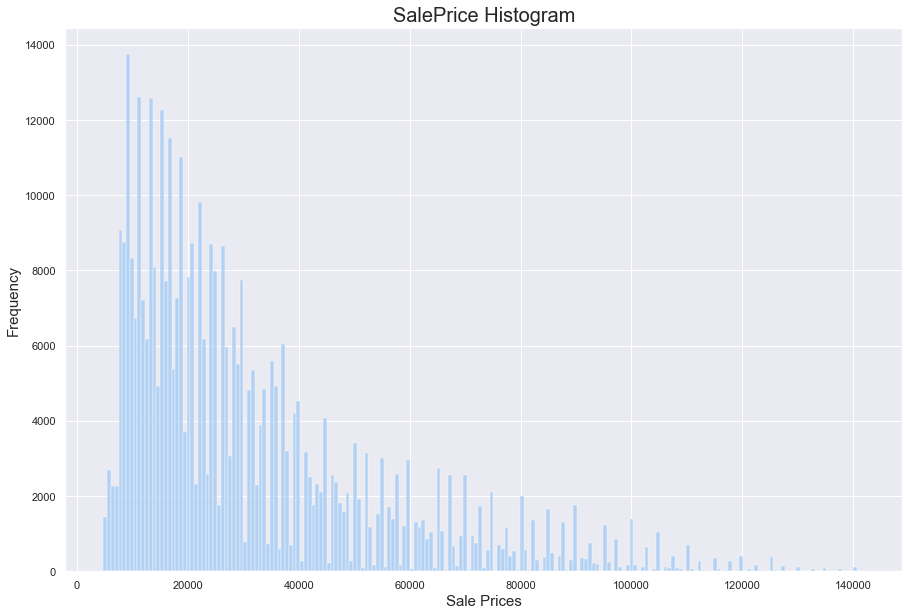

In [26]:
# Histogram of SalePrice (target variable)
plt.figure(figsize = (15, 10))
saleprice_hist = sns.histplot(df["SalePrice"])
saleprice_hist.set_title("SalePrice Histogram", fontsize = 20)
saleprice_hist.set_xlabel("Sale Prices", fontsize = 15)
saleprice_hist.set_ylabel("Frequency", fontsize = 15);

#### 7.3 Parsing Dates
When working with time series data, the time & date component should enriched as much as possible.

In [27]:
# Import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",
                 low_memory = False,
                 parse_dates = ["saledate"])

In [30]:
# Checking the saledate column's datatype
df.saledate.dtype

dtype('<M8[ns]')

In [31]:
# Checking first 1000 rows of sale date
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

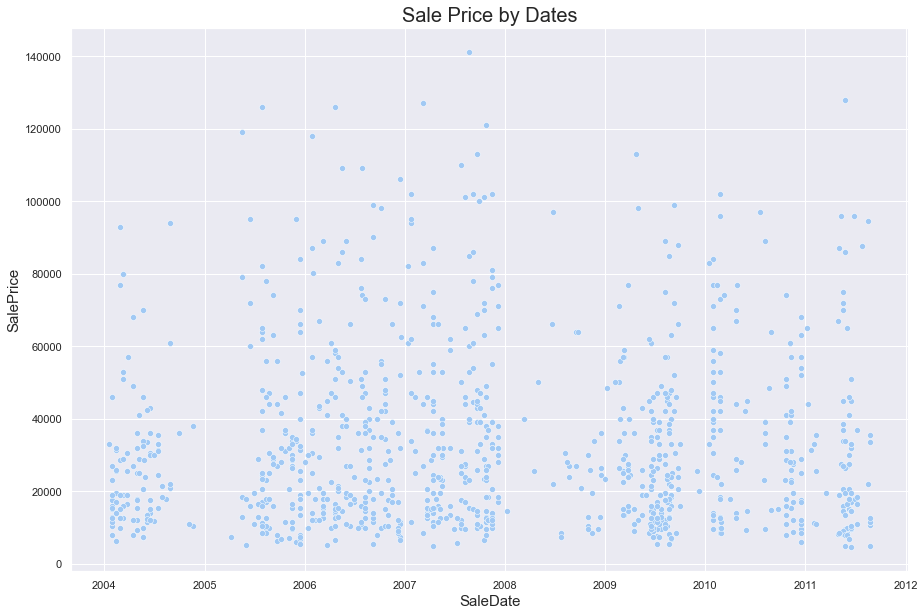

In [32]:
# Plotting scatter plot of saledate vs. SalePrice again 
plt.figure(figsize = (15, 10))
saleprice_date_plot = sns.scatterplot(df["saledate"][:1000], df["SalePrice"][:1000])
saleprice_date_plot.set_title("Sale Price by Dates", fontsize = 20)
saleprice_date_plot.set_xlabel("SaleDate", fontsize = 15)
saleprice_date_plot.set_ylabel("SalePrice", fontsize = 15);

In [33]:
# Checking first 5 rows of date-parsed dataframe
df.head(5).T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [34]:
# Top 20 rows of saledate column
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

#### 7.4 Sort DataFrame by `saledate`

As we're working with **time series data** and trying to predict future examples given past examples, it is best to sort the data by date.

In [36]:
# Sorting dates
df.sort_values(by = ["saledate"], inplace = True, ascending = True)
df.saledate.head(20)

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

#### 7.5 Making a Copy of Original DataFrame
Making a copy of the original dataframe will allow us to manipulate the copy with the original data remaining intact. 

In [40]:
# Copy of dataframe
df_tmp = df.copy()

### 8. Feature Engineering
#### 8.1 Add Datetime Parameter for saledate Column
Becuase the data was imported using `read_csv()` and parsing was using dates, different datetime attributes of the `saledate` column can now be accessed. 

In [43]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate
df_tmp.drop("saledate", axis = 1, inplace = True)

In [46]:
# Checking date enriched dataframe
df_tmp.head(5).T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


In [48]:
# Checking bulldozer sales by state
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [49]:
# Checking for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [51]:
# Checking for missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

#### 8.2 Convert Strings to Categories
We will need to convert our data into numbers through converting the columns with the string datatype into a category datatype.

In [56]:
# Checking which columns contain string observations
for columns, values in df_tmp.items():
    if pd.api.types.is_string_dtype(values):
        print(columns)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


There are **44** features with string datatypes. 

In [63]:
# Converting string values into categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [65]:
# Observing data types of string features now
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

All of the string data is now categorical, and these categories can be converted to numbers, however, there's still missing values. Processed data must be saved before filling missing values, so that we can access the preprocessed and clean data without having to clean the data again.

#### 8.3 Save Processed Data

In [72]:
# Save preprocessed data
df_tmp.to_csv("train_temp.csv",
               index = False)

In [74]:
# Import preprocessed data
df_tmp = pd.read_csv("train_temp.csv",
                     low_memory = False)
df_tmp.head(5).T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


#### 8.4 Fill Missing Values
The missing values of any column will be filled with the median of that column as **median** is robust to outliers.

###### Fill Numerical Missing Values First

In [76]:
# Check which columns are numeric
for features, values in df_copy.items():
    if pd.api.types.is_numeric_dtype(values):
        print(features)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter


In [79]:
# Check which numeric columns have null values
for features, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            print(features)

auctioneerID
MachineHoursCurrentMeter


In [85]:
# Fill missing data in numeric columns with the median
for features, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            # Add a binary column which tells if the data was missing or not
            df_tmp[features + "_is_missing"] = pd.isnull(values)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[features] = values.fillna(values.median())

In [86]:
# Checking if there are any null values now
for features, values in df_tmp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum():
            print(features)

In [87]:
# Check to see how many examples were missing using auctioneerID feature
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [89]:
# Features with missing values are now all categorical
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

#### 8.5 Filling and Turning Categorical Variables into Numbers

In [90]:
# Check for columns which are not numeric
for features, values in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(features)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [92]:
# Turning all categorical features to numeric features
for features, values in df_tmp.items():
    # Check for columns that aren't numeric
    if not pd.api.types.is_numeric_dtype(values):
        # Add binary column to indicate whether sample had missing value
        df_tmp[features + "_is_missing"] = pd.isnull(values)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[features] = pd.Categorical(values).codes + 1

In [93]:
# Check data types of dataframe
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [94]:
# Checking dataframe (should include additional features indicating if missing values are presentt for each categorical feature)
df_tmp.head(5).T

,0,1,2,3,4
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500.0,30000.0,21000.0,33000.0,24000.0
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,True
Blade_Type_is_missing,False,True,False,True,True
Travel_Controls_is_missing,False,True,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [101]:
# Checking to see if there are still any missing values
df_tmp.isna().sum()[:53]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

### 10. Data Preprocessing

According to [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

This makes sense because this is a time series problem.

Because of this, randomly splitting our data into train and test sets using `train_test_split()` would not work.

Instead, we will split this data into training, validation and test sets using the date each observation occured.

For this data:
* Training = all samples up untill 2011.
* Valid = all samples from Jan 1, 2012 to April 30, 2012.
* Test = all samples from May 1, 2012 to November 1, 2012.

In [106]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

# Checking size of validation and training sets
print("The size of the validation set is: " + str(len(df_val)))
print("The size of the training set is: " + str(len(df_train)))

The size of the validation set is: 11573
The size of the training set is: 401125


In [107]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice

# Checking the shapes of the X and y training/validation sets
print("The shape of X_valid is: " + str(len(X_valid)))
print("The shape of y_valid is: " + str(len(y_valid)))
print("The shape of X_train is: " + str(len(X_train)))
print("The shape of y_train is: " + str(len(y_train)))

The shape of X_valid is: 11573
The shape of y_valid is: 11573
The shape of X_train is: 401125
The shape of y_train is: 401125


### 11 Modeling

#### 11.1 Building an Evaluation Function
According to [Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) the evaluation function that should be used for this data is root mean squared log error (RMSLE).

**RMSLE** = ratios matter more than differences, meaning that being $10 off is not as significant as being 10% off.
**MAE** = more about exact differences..

Since Scikit-Learn does not have a function built-in for RMSLE, we will have to create our own.

This will be done by taking the square root of Scikit-Learn's mean_squared_log_erro (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

For the sake of comparing additional metrics, we will also calculate MAE and R^2. 

In [108]:
# rmsle function
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# model evaluation (metrics) function
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

#### 11.2 Testing our Models on a Subset

Training the models on the entire dataset would take too long and too much computing power. 

To counter this issue, we'll take a sample of the training set and tune the hyperparameters on that before training a larger model.

In [113]:
len(X_train)

401125

There are over 400,000 rows/observations in this dataframe, which would make computation too time consuming on the average computer. Hence, a random sample selection will required when training our models.

#### 11.3 Model Choices

Since we are training our models on a subset of the data (likely around ~1000 samples), we will be using the RandomForestRegressor() ensemble model, and its results will tuned. 

#### Why these?
We selected these models through the help of the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Since this is a time series regression problem, and we are only training our models on a small subset (much less than 400k, closer to 10k samples) of the data with no knowledge of which of the 50+ features are important for analysis, the documentation suggests the usage of:
* SVR
* EnsembleRegressors
* Ridge Regression

Since we only want a sample of the data, altering the number of samples for each `n_estimator` in the `RandomForestRegressor()` sees using the `max_samples` parameter for the ensemble model will make sampling the data a possibility. Hence, we will set `max_samples` to 1000, so that every `n_estimator` (default 100) in our ensemble will only see 10000 random samples  from our DataFrame instead of all 400,000 observations. 

In other words, we'll be looking at 40x less samples, which means we'll get faster computation speeds, but we should expect slightly less results as the model has less samples to learn patterns from. 

#### Training the RandomForestRegressor() Model

In [122]:
# Instantiate RandomForestRegressor with max_samples = 1000
rf_model = RandomForestRegressor(n_jobs = -1,
                                 max_samples = 1000)

In [127]:
%%time 

# Fit model on training data
rf_model.fit(X_train, y_train)

Wall time: 1.8 s


RandomForestRegressor(max_samples=1000, n_jobs=-1)

In [128]:
# Model scores (metrics)
show_scores(rf_model)

{'Training MAE': 7672.367816540976,
 'Valid MAE': 9179.876471096519,
 'Training RMSLE': 0.34272109159250075,
 'Valid RMSLE': 0.37313250454617375,
 'Training R^2': 0.7577077810880621,
 'Valid R^2': 0.7463017681883435}

### 12. Hyperparameter Tuning and Cross-Validation

We will perform hyperparameter tuning in the `RandomForestRegressor()` model with **RandomizedSearchCV**.

In [129]:
%%time

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = rf_grid,
                              n_iter = 20,
                              cv = 5,
                              verbose = True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 3min 8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [130]:
# Best hyperparameters from the RandomizedSearch
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': None}

In [131]:
# Evaluate the RandomizedSearch Model
show_scores(rs_model)

{'Training MAE': 8597.538445243603,
 'Valid MAE': 10084.69142437704,
 'Training RMSLE': 0.3750963339148662,
 'Valid RMSLE': 0.39891686055124476,
 'Training R^2': 0.6973578843068138,
 'Valid R^2': 0.6871975074290976}

Tuning the hyperparameters and obtaining the best set of hyperparameters ensured the lowest RMSLE from the specified grid.

We can reduce `n_estimators` or altering other hyperparameters to improve model speed, but this will come at the cost of lower model performance.

In [133]:
%%time

fast_ideal_model = RandomForestRegressor(n_estimators = 40,
                                    min_samples_leaf = 3,
                                    max_features = 0.5,
                                    n_jobs = -1)

fast_ideal_model.fit(X_train, y_train)

Wall time: 22.4 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [134]:
show_scores(fast_ideal_model)

{'Training MAE': 2540.46494229736,
 'Valid MAE': 5923.309824884564,
 'Training RMSLE': 0.12929857348544802,
 'Valid RMSLE': 0.24362446102760033,
 'Training R^2': 0.967243795144929,
 'Valid R^2': 0.8820254973728618}

### 13. Model Predictions on Test Data
It is now time to make predictions on the test data with the trained model.

The model was trained on data prior to 2011. However, the test data is from May 1, 2012 to November 2012. 

So we are trying to use the patterns learned from our model in the training data to predict the sale price of Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

#### 13.1 Loading Test Data

In [186]:
df_test = pd.read_csv("Test.csv",
                      parse_dates = ["saledate"])

df_test.head(5).T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


#### 13.2 Preprocessing the Test Data

In [187]:
# Function to preprocess the the test data
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [188]:
# Preprocessing the test dataset
df_test = preprocess_data(df_test)
df_test.head(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [189]:
# Make predictions on the test dataset using the best model
test_preds = fast_ideal_model(df_test)

TypeError: 'RandomForestRegressor' object is not callable

This error is occurring because the test dataset (after preprocessing) has 101 columns, whereas, our training dataset (`X_train`) has 102 columns (after preprocessing).

In [190]:
# Finding how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

The test dataset wasn't missing any `auctioneerID` fields. To fix this issue, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with False, since of the `auctioneerID` fields are missing in the test dataset.

In [192]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head(5).T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


Now, the dataset matches the training dataset, we should be able to make predictions on it using the trained model.

In [196]:
# Make predictions on the test dataset using the best model
test_preds = fast_ideal_model.predict(df_test)
test_preds

array([16573.53422619, 18734.26835317, 49256.74287518, ...,
       15453.60119048, 20865.75644841, 30728.08035714])

When lookin at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

In [197]:
# DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,16573.534226
1,1227844,18734.268353
2,1227847,49256.742875
3,1227848,65240.093344
4,1227863,41712.997940
...,...,...
12452,6643171,45201.400613
12453,6643173,16878.970734
12454,6643184,15453.601190
12455,6643186,20865.756448


In [198]:
# Export predictions
df_preds.to_csv("predictions.csv",
                index = False)

### 14. Feature Importance

Since we have built a model which is able to make predictions, let's check which features of the data led to these predictions.

In our case, after the model learned the patterns in the data, which bulldozer sale attributes were most important for predicting a bulldozer's overall sale price?

In [199]:
# Find feature importance of the best RandomForestRegressor()
fast_ideal_model.feature_importances_

array([3.72660225e-02, 2.08044522e-02, 4.30808050e-02, 1.92736931e-03,
       3.76562535e-03, 1.96664714e-01, 3.38875855e-03, 1.10902294e-03,
       4.46147039e-02, 4.36162155e-02, 6.72309172e-02, 4.96082298e-03,
       2.19828506e-02, 1.67362637e-01, 3.88393622e-02, 7.16540469e-03,
       2.74883734e-03, 3.92860741e-03, 3.83630366e-03, 5.25528162e-02,
       4.04081606e-04, 6.72557823e-05, 8.69994665e-04, 3.35839691e-04,
       1.03652481e-03, 7.16844971e-05, 3.18657820e-05, 1.64050776e-02,
       2.47039025e-04, 1.66949160e-04, 4.90918510e-03, 2.05120052e-03,
       3.51529119e-03, 8.14589680e-04, 7.66770065e-04, 6.26428981e-03,
       7.94725982e-04, 1.40612502e-02, 3.70624977e-03, 1.84294336e-04,
       1.03699707e-03, 7.82703105e-04, 1.15774004e-03, 6.43280949e-04,
       5.10624912e-04, 3.69099016e-04, 1.60744602e-04, 1.71441813e-03,
       1.48454247e-03, 2.20898605e-04, 1.78133973e-04, 7.26606764e-02,
       4.90039269e-03, 7.21104886e-03, 3.69372306e-03, 1.14035238e-02,
      

In [207]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending = False)
          .reset_index(drop = True))
    
    sns.barplot(x = "feature_importance",
                y = "features",
                data = df[:n],
                orient = "h").set_title("Feature Importance", fontsize = 15)


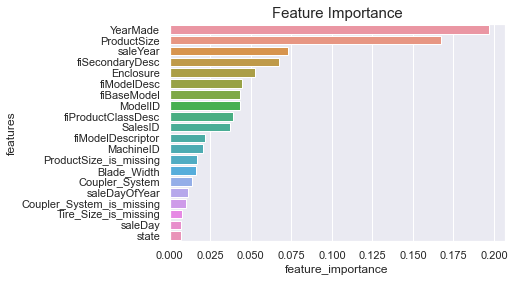

In [208]:
plot_features(X_train.columns, fast_ideal_model.feature_importances_)

**Conclusions from Feature Importance:**
* `YearMade` and `ProductSize` are by far the most important attributes of bulldozer that influence its sales price. This makes sense because newer bulldozers provide better performance and more technological features that are not present in older bulldozers. In addition, the size of the bulldozer matters too because larger bulldozers are much more powerful and can handle more destruction than the smaller ones. Hence, these two features influencing sale prices of a bulldozer the most makes sense. 

* `saleDay` and `state` are not so important for determining the price of a bulldozer and this makes sense because the day or state the bulldozer is sold doesn't us tell much about how well the bulldozer can peform. Hence, these two features do not influence the sales price of a bulldozer price much. Nor do any of the remaining features not shown in the feature importance plot because the plot orders the features in descending order, meaning only the top 20 features are visible.

### 15. Saving Models
The best and fastest model will be saved using the **joblib** library.

In [209]:
from joblib import dump

# Save model to file
dump(fast_ideal_model, filename = "random_forest_regressor_bulldozer_price_predictor.joblib")

['random_forest_regressor_bulldozer_price_predictor.joblib']